In [30]:
# Import libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Scikit-learn libraries for preprocessing and model evaluation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Define relative paths for file extraction
import zipfile
import os
#C:\Users\Boon Hwee\Desktop\Project2\census+income.zip

# Path to the zip file (could be absolute or relative to the current working directory)
zip_file_path = r'C:\Users\Boon Hwee\Desktop\Project2\census+income.zip'

#'C:\Users\Boon Hwee\Desktop\Project2\extracted_data'
# Create the directory if it doesn't exist and extract the zip file contents
# If the directory does not exist, it will be created
extract_to_path = r'C:\Users\Boon Hwee\Desktop\Project2\extracted_data'

# Create the directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Verify the contents of the extracted directory
extracted_files = os.listdir(extract_to_path)
print("Extracted files:", extracted_files)


Extracted files: ['adult.data', 'adult.names', 'adult.test', 'Index', 'old.adult.names']


In [31]:
# Load the dataset with appropriate column names
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
 "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
  "hours-per-week", "native-country", "income"]

# Need to change relative path
# Load dataset into df
#'C:\Users\Solo\Desktop\School\NTU Course 2\extracted_data\adult.data'
df = pd.read_csv(r'C:\Users\Boon Hwee\Desktop\Project2\extracted_data\adult.data', names=column_names, sep=r'\s*,\s*', engine='python')

df.describe()
df.info()
df.head()

print(df.head())  # Check the first few rows of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   7751

In [32]:
# Read the CSV file, specifying the separator as '\s*,\s*'and treat '?' as missing values, replacing them with NaN.
df = pd.read_csv(r'C:\Users\Boon Hwee\Desktop\Project2\extracted_data\adult.data', names=column_names,sep=r'\s*,\s*', engine='python', na_values='?')

# '?' will be lablelled  as NaN
# Check for missing values
print(df.isnull().sum())  # This will print the number of missing values in each column

# Confirm that there are no missing values left with values = zero
all_missing_handled = df.isnull().sum().all() == 0
print(f"All missing values handled: {all_missing_handled}")

# Once `all_missing_handled` is True, then all missing values have been handled.


age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
All missing values handled: True


In [33]:
# Separate features and target variable
X = df.drop('income', axis=1)  
y = df['income']

# Define which columns should be encoded vs scaled
categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
    ('scaler', StandardScaler())                    # Scale data
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical data
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply ColumnTransformer to the data
X_preprocessed = preprocessor.fit_transform(X)

# `X_preprocessed` is a numpy array with all features preprocessed


In [34]:
from scipy import sparse

if sparse.issparse(X_preprocessed):
    X_preprocessed = X_preprocessed.toarray()

print(X_preprocessed.shape)
print(len(preprocessor.get_feature_names_out()))    


(32561, 105)
105


In [35]:
# Convert the preprocessed data back to a DataFrame

X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=preprocessor.get_feature_names_out())


In [36]:
from sklearn.cluster import KMeans

# Initialize the KMeans object
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the model to data and predict cluster labels
clusters = kmeans.fit_predict(X_preprocessed)


In [37]:
df['cluster'] = clusters

from sklearn.metrics import silhouette_score

# The silhouette_score gives the average value for all the samples
# This gives a perspective into the density and separation of the formed clusters
silhouette_avg = silhouette_score(X_preprocessed, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.12354061496785869


   num__age  num__fnlwgt  num__education-num  num__capital-gain  \
0  0.557797    -0.107581            0.134314           0.115041   
1  0.224160    -0.039086            0.352884          -0.145920   
2 -0.671000     0.128987           -0.192404          -0.118568   

   num__capital-loss  num__hours-per-week  cat__workclass_Federal-gov  \
0          -0.215312             0.289344                    0.036347   
1           4.504309             0.236648                    0.037761   
2          -0.214507            -0.360481                    0.020657   

   cat__workclass_Local-gov  cat__workclass_Never-worked  \
0                  0.077605                -1.436568e-17   
1                  0.083614                 3.794708e-19   
2                  0.046808                 4.868549e-04   

   cat__workclass_Private  ...  cat__native-country_Portugal  \
0                0.670539  ...                  1.257485e-03   
1                0.682401  ...                 -4.336809e-18   
2    

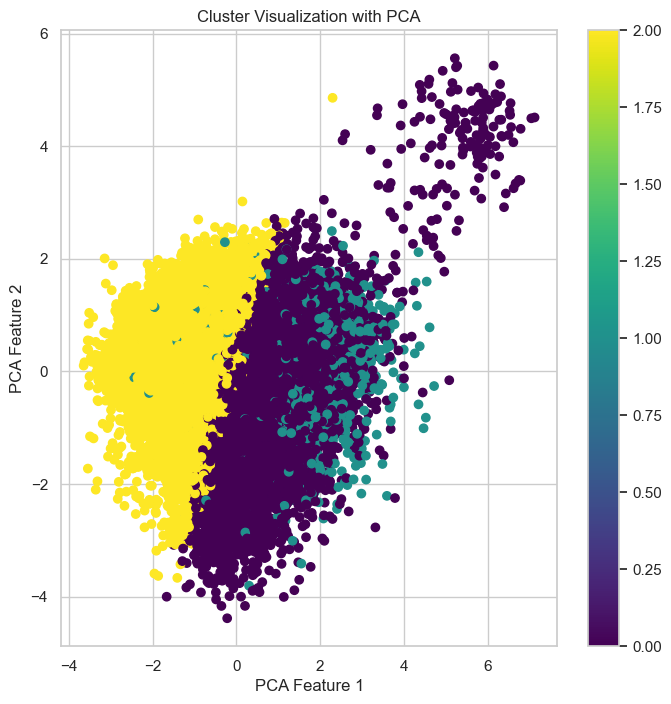

In [38]:
# preprocessor is the fitted ColumnTransformer & df is original dataframe before preprocessing

# Get the feature names after one-hot encoding
new_feature_names = preprocessor.get_feature_names_out()

# Define the KMeans clustering algorithm with the desired number of clusters
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

# Fit the KMeans model to the preprocessed data
kmeans.fit(X_preprocessed)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Convert the centroids to a DataFrame using the new feature names
centroids_df = pd.DataFrame(centroids, columns=new_feature_names)
print(centroids_df)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_preprocessed)

# Plot the clusters
plt.figure(figsize=(8, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title('Cluster Visualization with PCA')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar()
plt.show()


In [39]:
# Print out the column names to check
print("Centroids DataFrame columns:", centroids_df.columns.tolist())
print("Original numerical columns:", numerical_cols)


Centroids DataFrame columns: ['num__age', 'num__fnlwgt', 'num__education-num', 'num__capital-gain', 'num__capital-loss', 'num__hours-per-week', 'cat__workclass_Federal-gov', 'cat__workclass_Local-gov', 'cat__workclass_Never-worked', 'cat__workclass_Private', 'cat__workclass_Self-emp-inc', 'cat__workclass_Self-emp-not-inc', 'cat__workclass_State-gov', 'cat__workclass_Without-pay', 'cat__education_10th', 'cat__education_11th', 'cat__education_12th', 'cat__education_1st-4th', 'cat__education_5th-6th', 'cat__education_7th-8th', 'cat__education_9th', 'cat__education_Assoc-acdm', 'cat__education_Assoc-voc', 'cat__education_Bachelors', 'cat__education_Doctorate', 'cat__education_HS-grad', 'cat__education_Masters', 'cat__education_Preschool', 'cat__education_Prof-school', 'cat__education_Some-college', 'cat__marital-status_Divorced', 'cat__marital-status_Married-AF-spouse', 'cat__marital-status_Married-civ-spouse', 'cat__marital-status_Married-spouse-absent', 'cat__marital-status_Never-married

In [40]:
# df is the dataframe and 'numerical_cols' are the column names of the numerical features
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Fit the KMeans model to the preprocessed data
kmeans.fit(X_preprocessed)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Print out the column names to check 
print("Centroids DataFrame columns:", centroids_df.columns.tolist())
print("Original numerical columns:", numerical_cols)

# Scale the centroids back to the original numerical scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[numerical_cols])

# Inverse transform the centroids using the scaler
centroids_original_scale = scaler.inverse_transform(centroids[:, :len(numerical_cols)])  # Only select numerical columns

# Create a DataFrame with the original scale for numerical features
centroids_original_scale_df = pd.DataFrame(centroids_original_scale, columns=numerical_cols)

# Print the centroids with the original scale of numerical features
print(centroids_original_scale_df)


Centroids DataFrame columns: ['num__age', 'num__fnlwgt', 'num__education-num', 'num__capital-gain', 'num__capital-loss', 'num__hours-per-week', 'cat__workclass_Federal-gov', 'cat__workclass_Local-gov', 'cat__workclass_Never-worked', 'cat__workclass_Private', 'cat__workclass_Self-emp-inc', 'cat__workclass_Self-emp-not-inc', 'cat__workclass_State-gov', 'cat__workclass_Without-pay', 'cat__education_10th', 'cat__education_11th', 'cat__education_12th', 'cat__education_1st-4th', 'cat__education_5th-6th', 'cat__education_7th-8th', 'cat__education_9th', 'cat__education_Assoc-acdm', 'cat__education_Assoc-voc', 'cat__education_Bachelors', 'cat__education_Doctorate', 'cat__education_HS-grad', 'cat__education_Masters', 'cat__education_Preschool', 'cat__education_Prof-school', 'cat__education_Some-college', 'cat__marital-status_Divorced', 'cat__marital-status_Married-AF-spouse', 'cat__marital-status_Married-civ-spouse', 'cat__marital-status_Married-spouse-absent', 'cat__marital-status_Never-married

In [41]:
df['cluster'] = clusters

# Calculate the mode for categorical features in each cluster
for col in categorical_cols:
    print(f"Categorical feature: {col}")
    print(df.groupby('cluster')[col].agg(pd.Series.mode))
    print("\n")


Categorical feature: workclass
cluster
0    Private
1    Private
2    Private
Name: workclass, dtype: object


Categorical feature: education
cluster
0    HS-grad
1    HS-grad
2    HS-grad
Name: education, dtype: object


Categorical feature: marital-status
cluster
0    Married-civ-spouse
1    Married-civ-spouse
2         Never-married
Name: marital-status, dtype: object


Categorical feature: occupation
cluster
0    Exec-managerial
1    Exec-managerial
2       Adm-clerical
Name: occupation, dtype: object


Categorical feature: relationship
cluster
0          Husband
1          Husband
2    Not-in-family
Name: relationship, dtype: object


Categorical feature: race
cluster
0    White
1    White
2    White
Name: race, dtype: object


Categorical feature: sex
cluster
0      Male
1      Male
2    Female
Name: sex, dtype: object


Categorical feature: native-country
cluster
0    United-States
1    United-States
2    United-States
Name: native-country, dtype: object




In [42]:
from scipy.stats import chi2_contingency

# Perform Chi-Squared tests for categorical features across clusters
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['cluster'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Categorical feature: {col}")
    print(f"Chi-Squared Test Statistic: {chi2}, p-value: {p}")
    print("\n")


Categorical feature: workclass
Chi-Squared Test Statistic: 1795.1263495967696, p-value: 0.0


Categorical feature: education
Chi-Squared Test Statistic: 2062.8990894286853, p-value: 0.0


Categorical feature: marital-status
Chi-Squared Test Statistic: 17432.471594786035, p-value: 0.0


Categorical feature: occupation
Chi-Squared Test Statistic: 3622.7468723793904, p-value: 0.0


Categorical feature: relationship
Chi-Squared Test Statistic: 16866.061675756875, p-value: 0.0


Categorical feature: race
Chi-Squared Test Statistic: 646.9677921257535, p-value: 1.8542553816850192e-134


Categorical feature: sex
Chi-Squared Test Statistic: 5396.128595300393, p-value: 0.0


Categorical feature: native-country
Chi-Squared Test Statistic: 373.5029714893858, p-value: 1.8430777373003875e-39




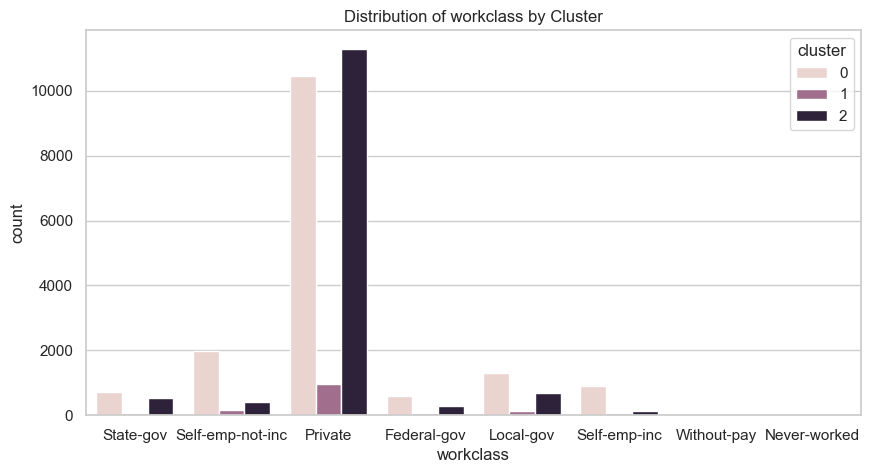

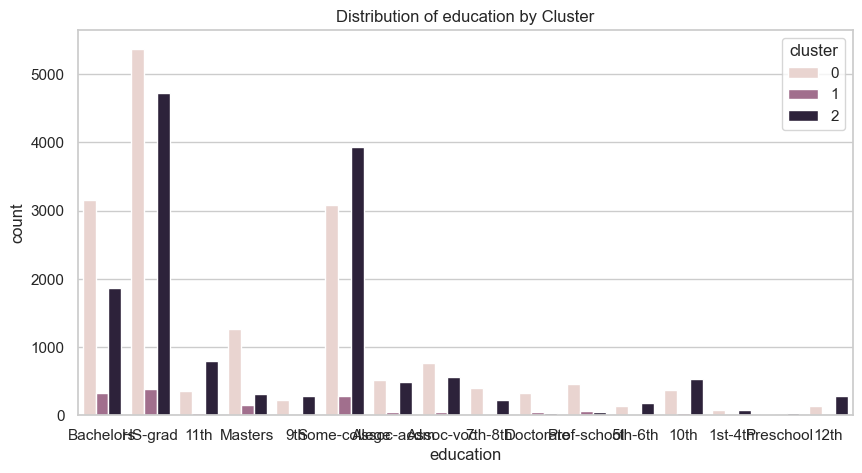

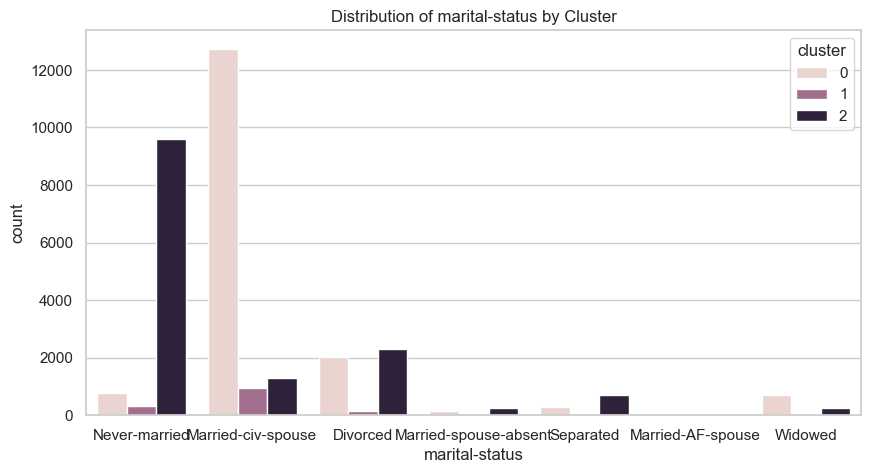

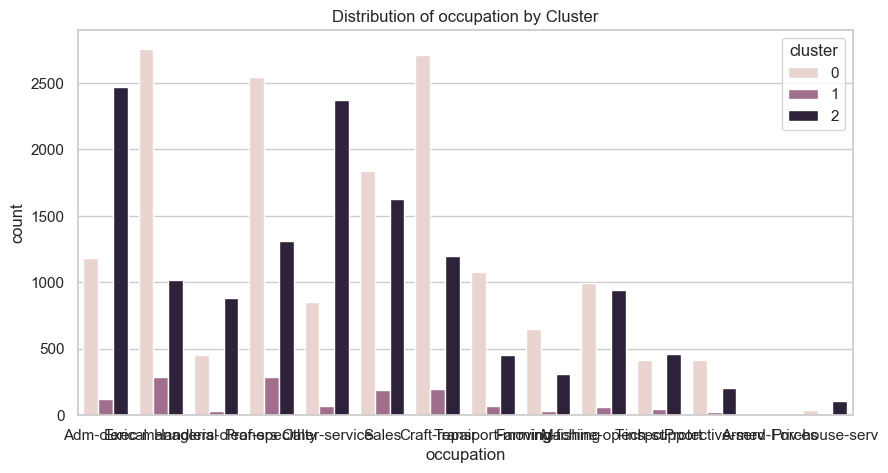

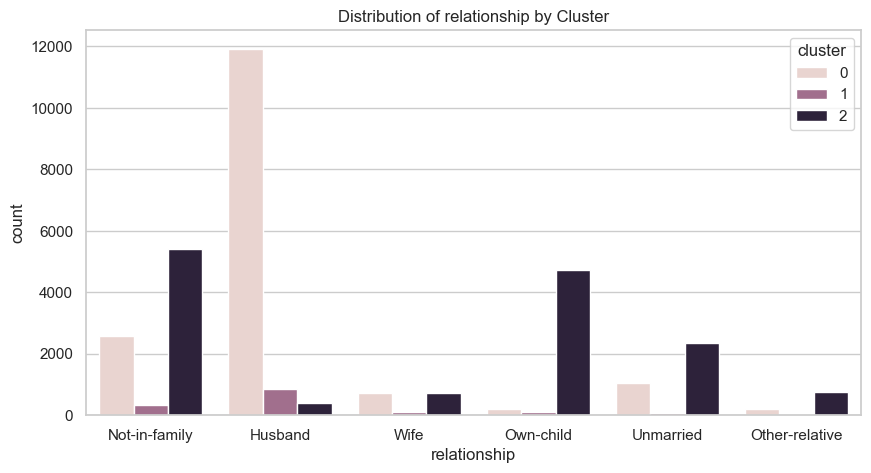

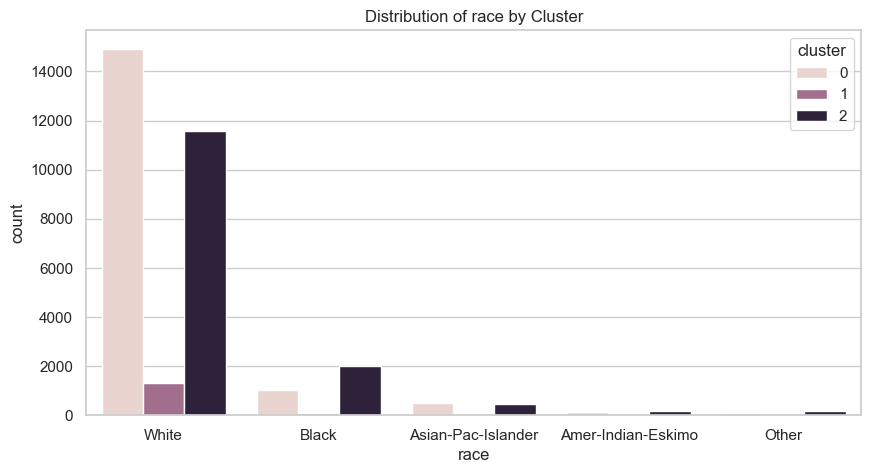

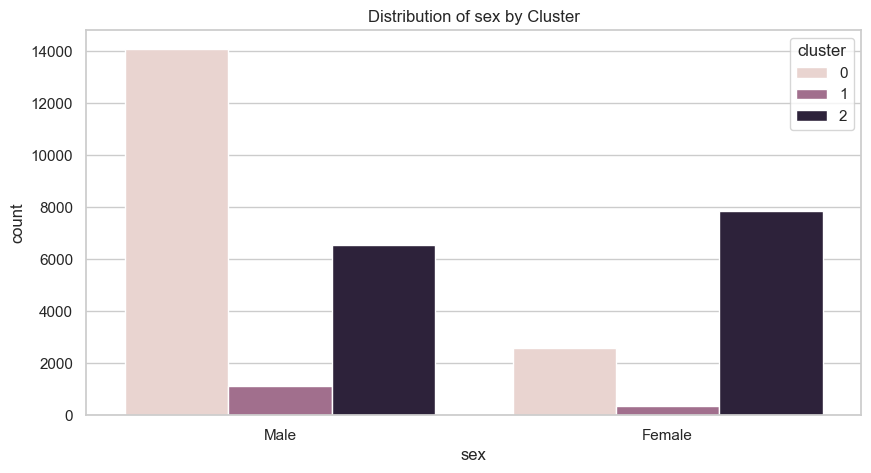

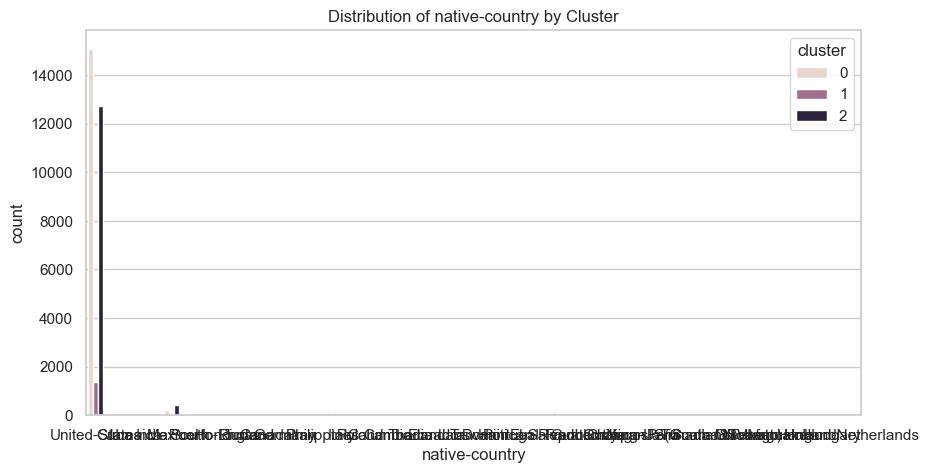

In [43]:
# Visualize the distribution of categorical features within each cluster
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, hue='cluster', data=df)
    plt.title(f'Distribution of {col} by Cluster')
    plt.show()


In [44]:
# Calculate the mean of numerical features by cluster
cluster_means = df.groupby('cluster')[numerical_cols].mean()

# Calculate the mode of categorical features by cluster
cluster_modes = df.groupby('cluster')[categorical_cols].agg(pd.Series.mode)

# Display the cluster characteristics
print("Cluster Means:")
print(cluster_means)
print("\nCluster Modes:")
print(cluster_modes)


Cluster Means:
               age         fnlwgt  education-num  capital-gain  capital-loss  \
cluster                                                                        
0        46.183234  178398.582000      10.428126   1928.513871      0.543352   
1        41.639245  185652.934592      10.988537      0.000000   1902.333109   
2        29.449858  203402.331990       9.584127    201.845576      0.866773   

         hours-per-week  
cluster                  
0             44.014141  
1             43.359407  
2             35.987907  

Cluster Modes:
        workclass education      marital-status       occupation  \
cluster                                                            
0         Private   HS-grad  Married-civ-spouse  Exec-managerial   
1         Private   HS-grad  Married-civ-spouse  Exec-managerial   
2         Private   HS-grad       Never-married     Adm-clerical   

          relationship   race     sex native-country  
cluster                                   

In [45]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 'X_preprocessed' is preprocessed data and 'clusters' is cluster assignments
# Silhouette Score (higher is better)
silhouette_avg = silhouette_score(X_preprocessed, clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Score (lower is better)
davies_bouldin = davies_bouldin_score(X_preprocessed, clusters)
print(f"Davies-Bouldin Score: {davies_bouldin}")

# Calinski-Harabasz Score (higher is better)
calinski_harabasz = calinski_harabasz_score(X_preprocessed, clusters)
print(f"Calinski-Harabasz Score: {calinski_harabasz}")


Silhouette Score: 0.12354061496785869
Davies-Bouldin Score: 2.1848302089846925
Calinski-Harabasz Score: 3760.8188437898834


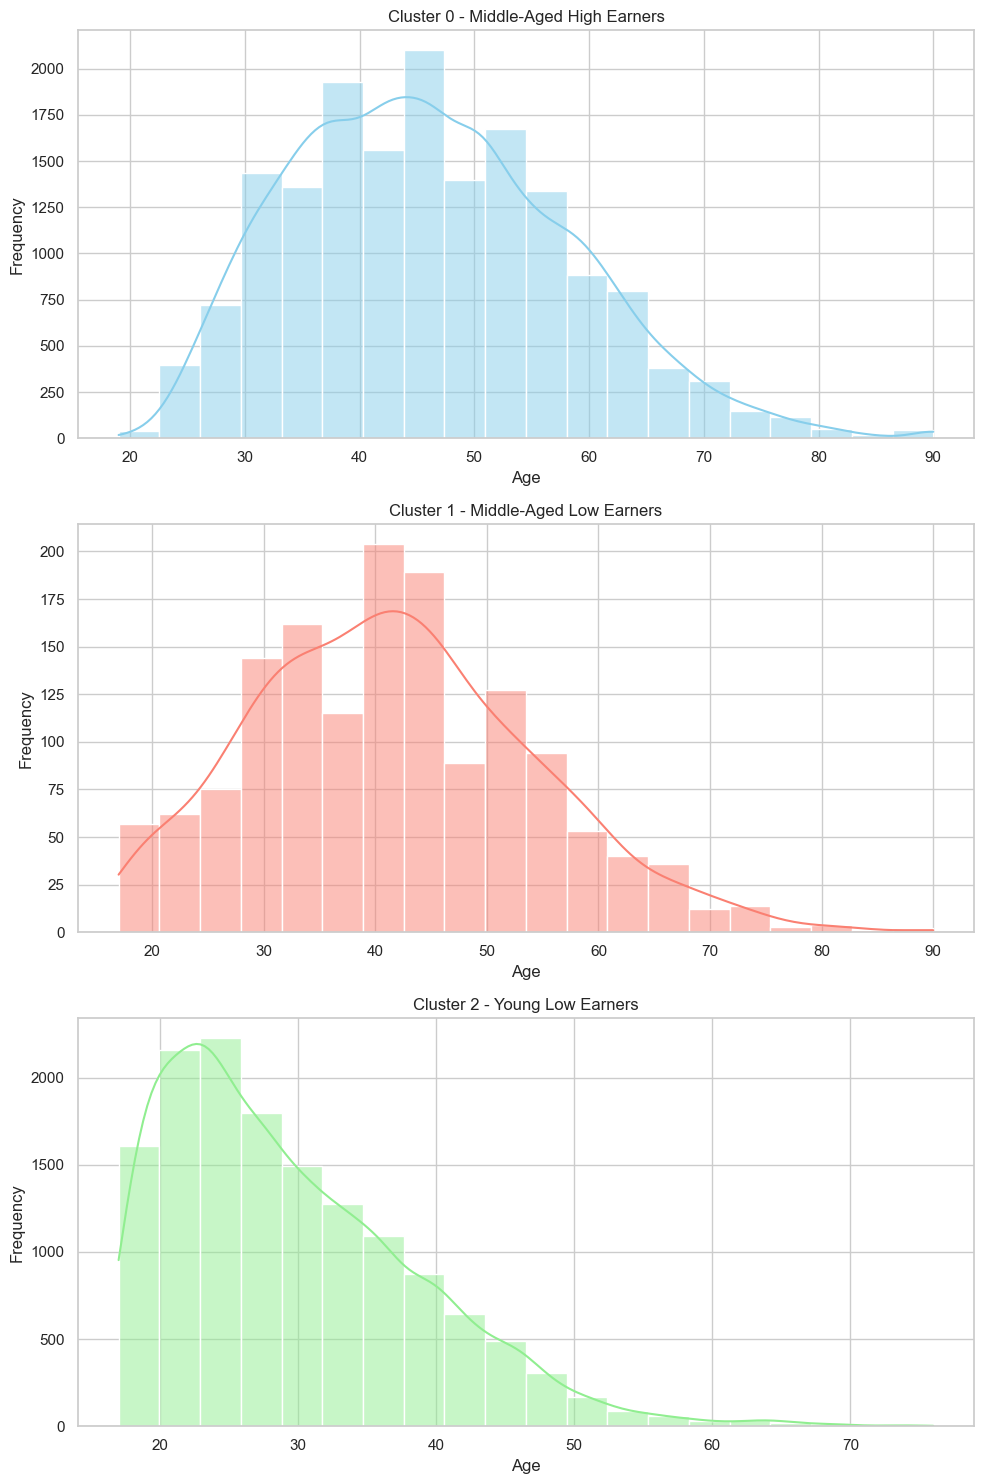

<Figure size 640x480 with 0 Axes>

In [46]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create subplots for each visualization
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Visualization 1: Age Distribution
sns.histplot(data=df[df['cluster'] == 0], x='age', bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Cluster 0 - Middle-Aged High Earners')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df[df['cluster'] == 1], x='age', bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Cluster 1 - Middle-Aged Low Earners')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

sns.histplot(data=df[df['cluster'] == 2], x='age', bins=20, kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Cluster 2 - Young Low Earners')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Visualization 2: Education Level Distribution
sns.countplot(data=df, x='education', hue='cluster', palette='pastel', ax=axes[0])
axes[0].set_title('Education Level Distribution by Cluster')
axes[0].set_xlabel('Education Level')
axes[0].set_ylabel('Count')

# Visualization 3: Income Distribution (capital-gain)
sns.histplot(data=df[df['cluster'] == 0], x='capital-gain', bins=20, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Cluster 0 - Middle-Aged High Earners')
axes[1].set_xlabel('Capital Gain')
axes[1].set_ylabel('Frequency')

sns.histplot(data=df[df['cluster'] == 1], x='capital-gain', bins=20, kde=True, ax=axes[2], color='salmon')
axes[2].set_title('Cluster 1 - Middle-Aged Low Earners')
axes[2].set_xlabel('Capital Gain')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [47]:
cluster_counts = df['cluster'].value_counts()
print(cluster_counts)


cluster
0    16689
2    14389
1     1483
Name: count, dtype: int64


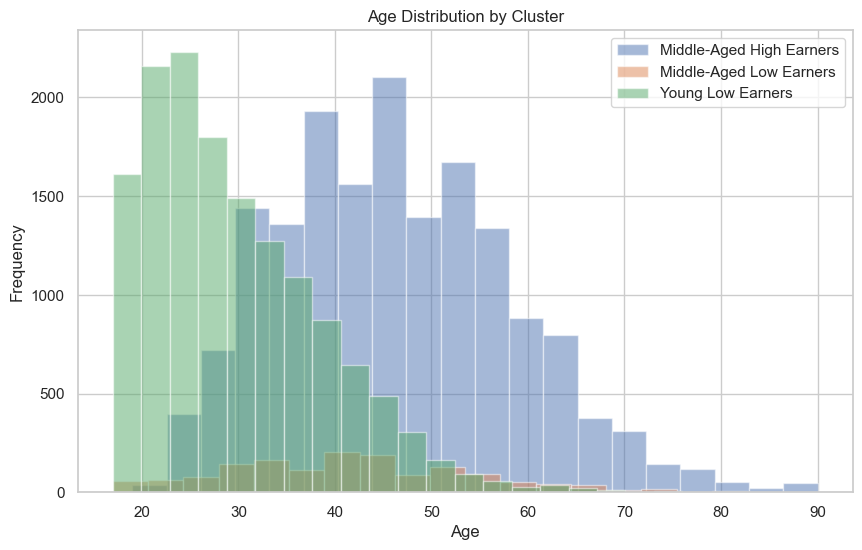

In [48]:
# Filter the DataFrame to include only clusters 0, 1, and 2
filtered_df = df[df['cluster'].isin([0, 1, 2])]

# Create a dictionary to map cluster IDs to labels
cluster_labels = {
    0: "Middle-Aged High Earners",
    1: "Middle-Aged Low Earners",
    2: "Young Low Earners"
}

# Plot age distribution for clusters 0, 1, and 2 with labels
plt.figure(figsize=(10, 6))
for cluster_id in [0, 1, 2]:
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_id]
    plt.hist(cluster_data['age'], bins=20, alpha=0.5, label=cluster_labels[cluster_id])

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Cluster')
plt.legend()
plt.show()


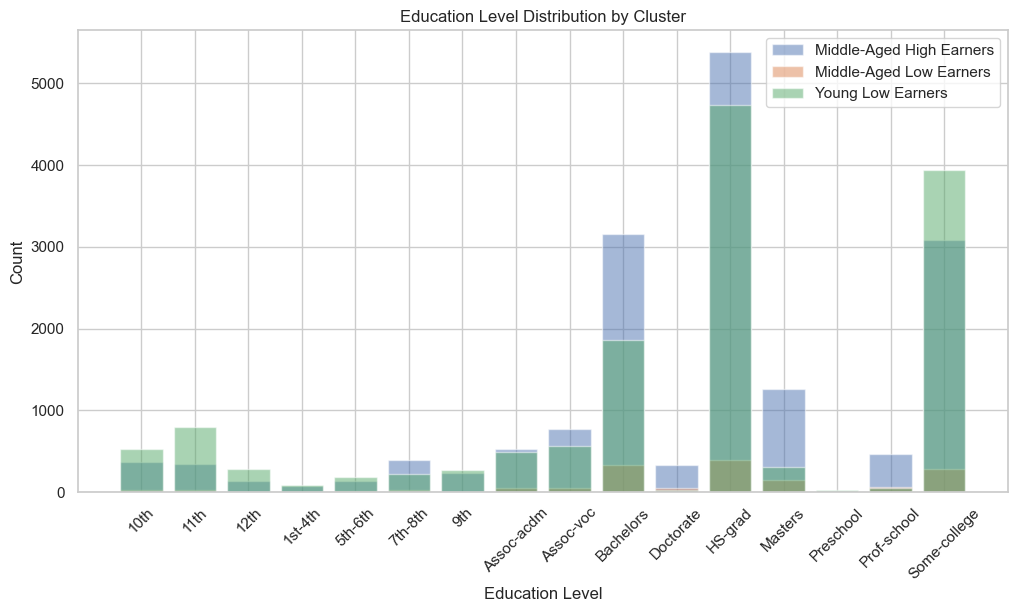

In [49]:
# Plot education level distribution for clusters with labels
plt.figure(figsize=(12, 6))
for cluster_id, label in cluster_labels.items():
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_id]
    education_counts = cluster_data['education'].value_counts().sort_index()
    plt.bar(education_counts.index, education_counts.values, alpha=0.5, label=label)

plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution by Cluster')
plt.xticks(rotation=45)
plt.legend()
plt.show()


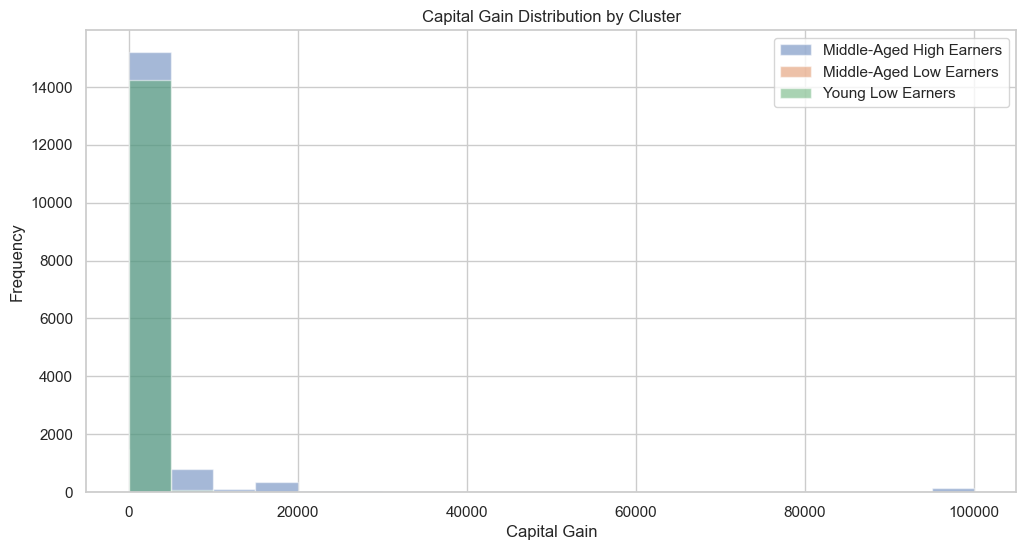

In [50]:
# Plot capital gain distribution for clusters with labels
plt.figure(figsize=(12, 6))
for cluster_id, label in cluster_labels.items():
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_id]
    plt.hist(cluster_data['capital-gain'], bins=20, alpha=0.5, label=label)

plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.title('Capital Gain Distribution by Cluster')
plt.legend()
plt.show()


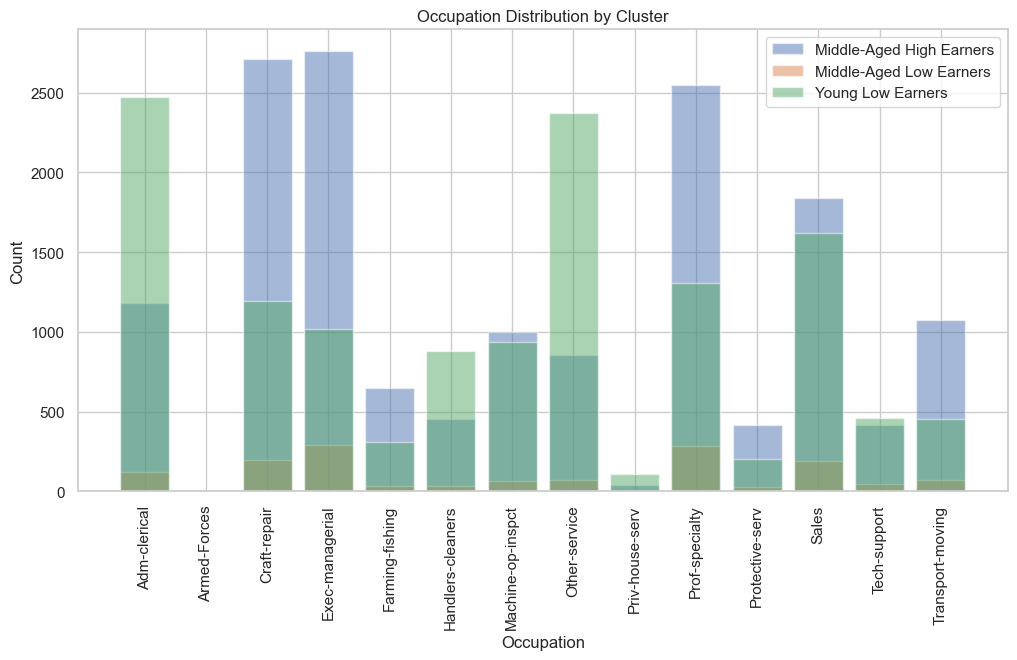

In [51]:
# Plot occupation distribution for clusters with labels
plt.figure(figsize=(12, 6))
for cluster_id, label in cluster_labels.items():
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_id]
    occupation_counts = cluster_data['occupation'].value_counts().sort_index()
    plt.bar(occupation_counts.index, occupation_counts.values, alpha=0.5, label=label)

plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution by Cluster')
plt.xticks(rotation=90)
plt.legend()
plt.show()


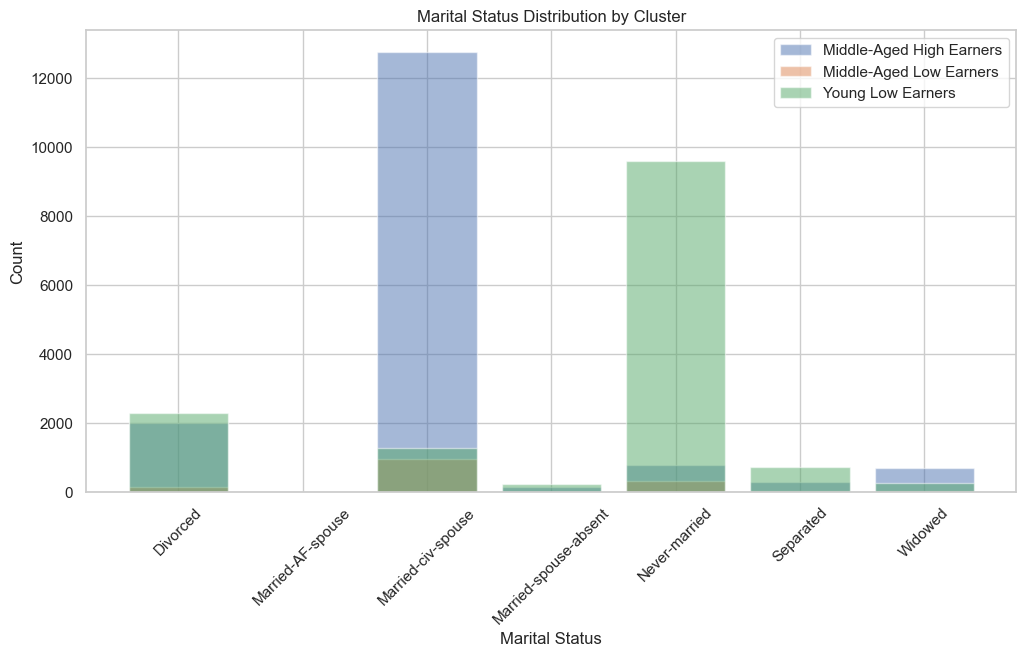

In [52]:
# Plot marital status distribution for clusters with labels
plt.figure(figsize=(12, 6))
for cluster_id, label in cluster_labels.items():
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_id]
    marital_status_counts = cluster_data['marital-status'].value_counts().sort_index()
    plt.bar(marital_status_counts.index, marital_status_counts.values, alpha=0.5, label=label)

plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution by Cluster')
plt.xticks(rotation=45)
plt.legend()
plt.show()


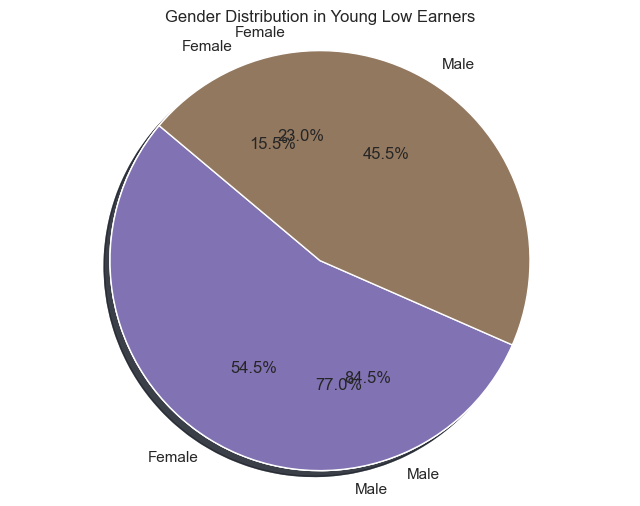

In [53]:
# Plot gender distribution for clusters with labels
plt.figure(figsize=(8, 6))
for cluster_id, label in cluster_labels.items():
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_id]
    gender_counts = cluster_data['sex'].value_counts()
    plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, shadow=True)
    plt.axis('equal')
    plt.title(f'Gender Distribution in {label}')

plt.show()


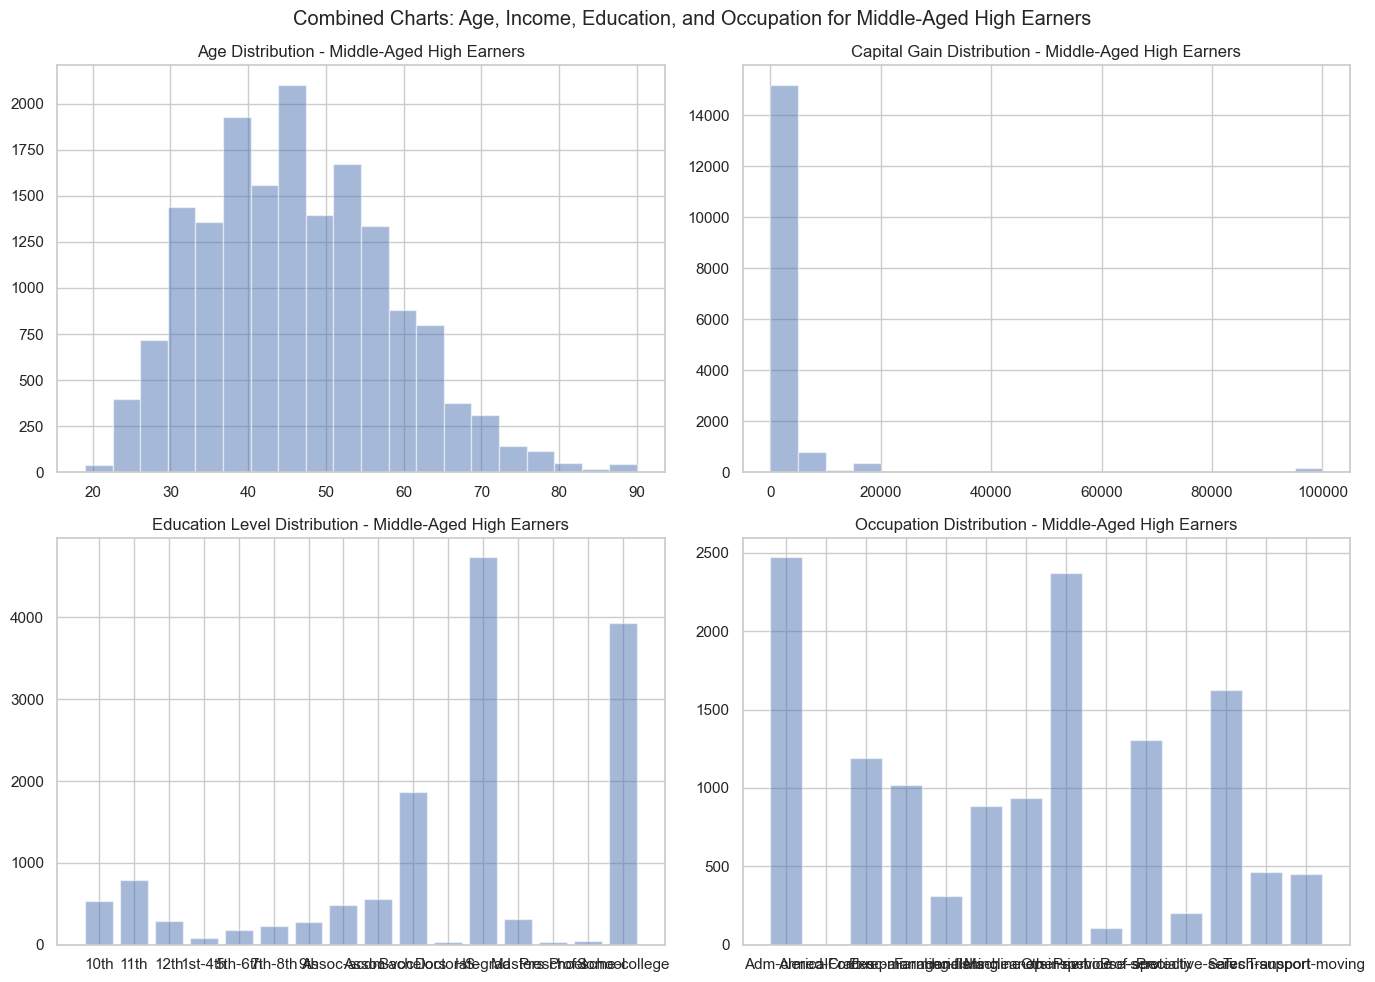

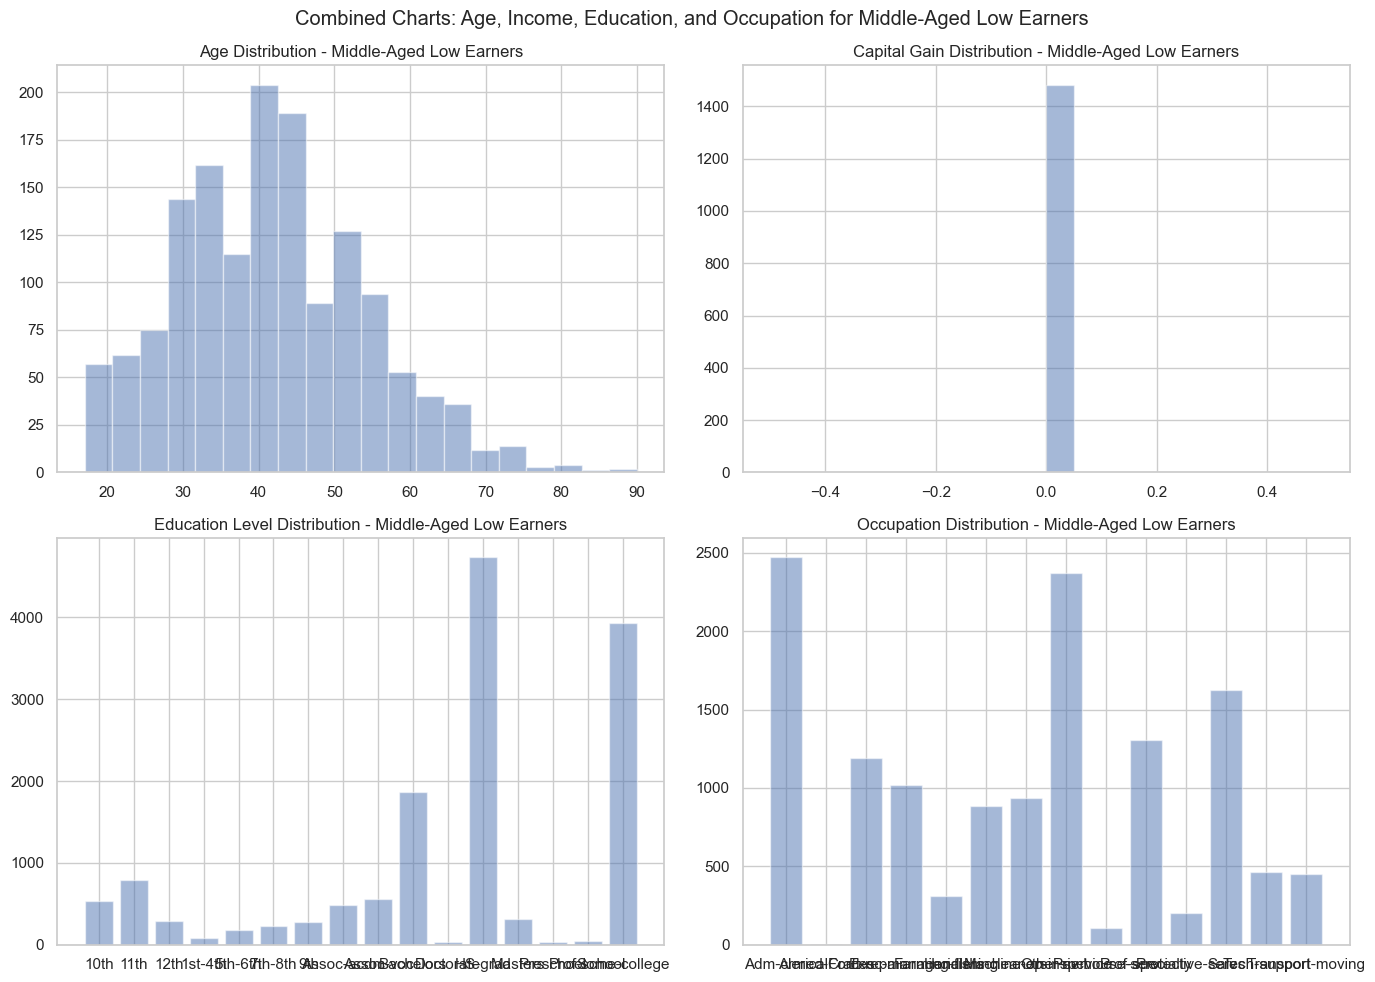

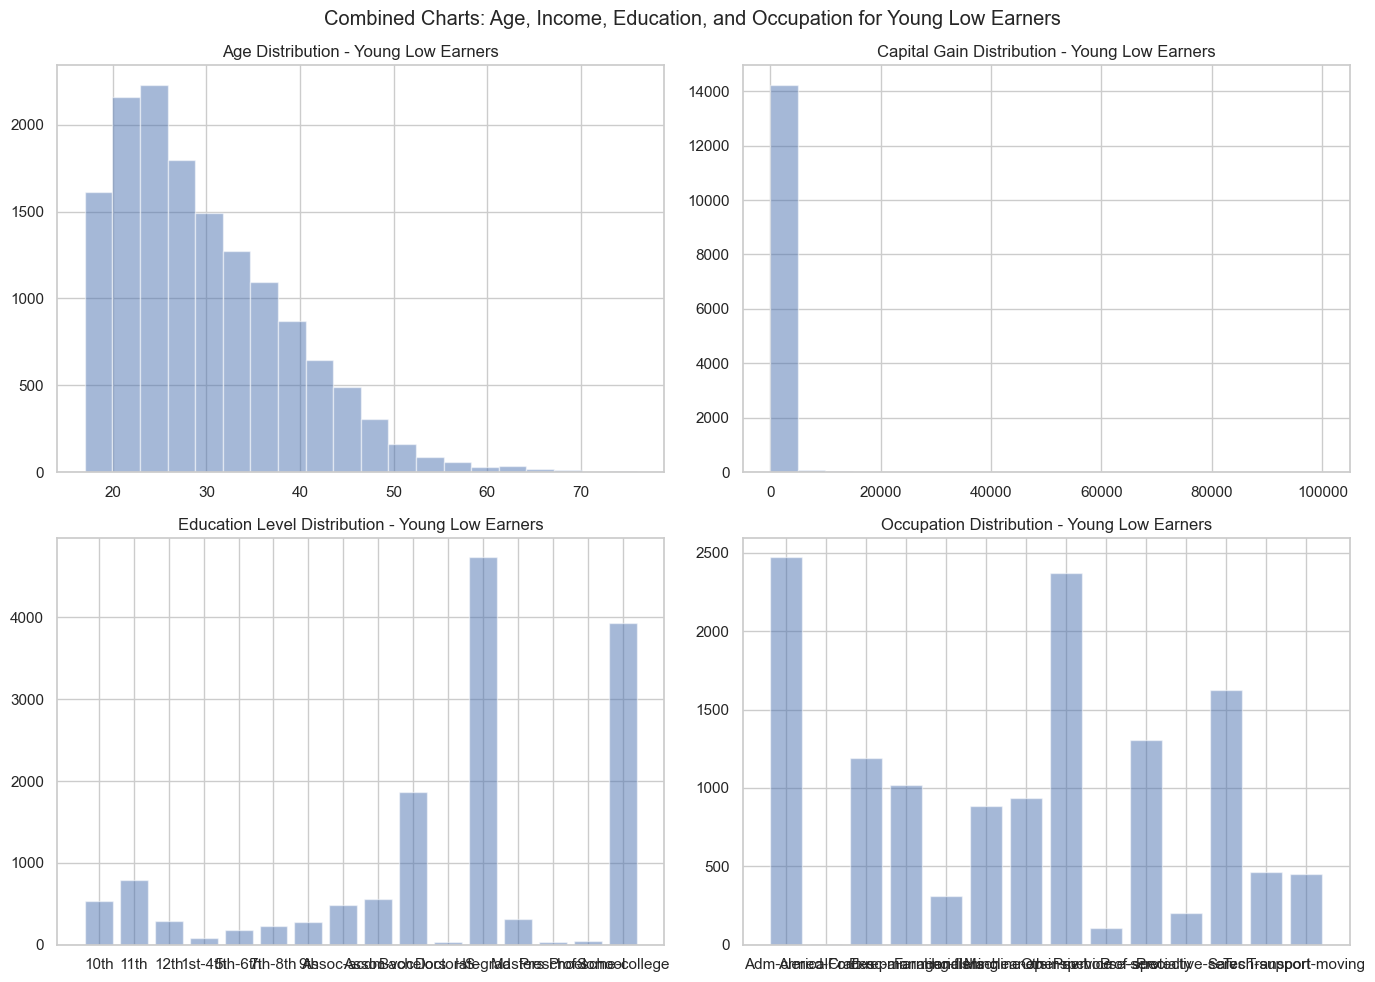

In [54]:
# Looping
for cluster_id in cluster_labels.keys():
    cluster_data = filtered_df[filtered_df['cluster'] == cluster_id]

    # Create a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Add plots to each subplot
   
    # Subplot 1: Age Distribution
    axes[0, 0].hist(cluster_data['age'], bins=20, alpha=0.5)
    axes[0, 0].set_title(f'Age Distribution - {cluster_labels[cluster_id]}')

    # Subplot 2: Income Distribution (Capital Gain)
    axes[0, 1].hist(cluster_data['capital-gain'], bins=20, alpha=0.5)
    axes[0, 1].set_title(f'Capital Gain Distribution - {cluster_labels[cluster_id]}')

    # Subplot 3: Education Level Distribution
    axes[1, 0].bar(education_counts.index, education_counts.values, alpha=0.5)
    axes[1, 0].set_title(f'Education Level Distribution - {cluster_labels[cluster_id]}')

    # Subplot 4: Occupation Distribution
    axes[1, 1].bar(occupation_counts.index, occupation_counts.values, alpha=0.5)
    axes[1, 1].set_title(f'Occupation Distribution - {cluster_labels[cluster_id]}')

    # Add overall title
    fig.suptitle(f'Combined Charts: Age, Income, Education, and Occupation for {cluster_labels[cluster_id]}')

    # Adjust spacing between subplots
    plt.tight_layout()

    # Show the combined charts
    plt.show()
